# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Add Matplotlib inline magic command
%matplotlib inline
# Import Matplotlib to style the chart
from matplotlib import style
# Import Ticker
import matplotlib.ticker as ticker


# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Explore city_data file to before merging
#city_data_df.shape
#city_data_df.columns
city_data_df.sort_values(by=['city']).head()

,city,driver_count,type
61,Amandaburgh,12,Urban
9,Barajasview,26,Urban
90,Barronchester,11,Suburban
88,Bethanyland,22,Suburban
115,Bradshawfurt,7,Rural


In [3]:
# Explore ride data file to prove point 
#ride_data_df.shape
#ride_data_df.columns
ride_data_df.sort_values(by=['city']).head()

,city,date,fare,ride_id
919,Amandaburgh,2019-04-24 08:02:27,14.55,7836117055007
239,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753
235,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437
164,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986
1155,Amandaburgh,2019-03-07 02:26:33,18.76,3419454549176


In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
# pyber_data_df.sort_values(by=['city']).head()
# Another way to say head => .head(5) = [:5]
pyber_data_df.sort_values(by=['city'])[:5]
#pyber_data_df.shape
#pyber_data_df.columns

,city,date,fare,ride_id,driver_count,type
919,Amandaburgh,2019-04-24 08:02:27,14.55,7836117055007,12,Urban
239,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
235,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
164,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1155,Amandaburgh,2019-03-07 02:26:33,18.76,3419454549176,12,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [6]:
#2. Get the total drivers for each city type 

# My original: drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]

# My tutor explained to not use the merged table, pyber_data_df, to get my driver count, but to use the city_data_df because
# city_data_df already has the count, then when we appended the ride_data_df with the city_data_df; it is basically multiplying
# the driver_count by the number of times the city appears in the in the ride_data_df.

# To demonstrate, lets explore the dataframes and let's follow the city of Amandaburgh.

# 2A. Review the number of times a city appears in the city_data_df. 
city_count_city_data = city_data_df.groupby(["city"]).count()["driver_count"]
city_count_city_data.head()

city
Amandaburgh      1
Barajasview      1
Barronchester    1
Bethanyland      1
Bradshawfurt     1
Name: driver_count, dtype: int64

In [7]:
#  2B. Get the total driver count by city in the city_data_df.
drivers_w_citydf = city_data_df.groupby(["city"]).sum()["driver_count"]
drivers_w_citydf.head()

city
Amandaburgh      12
Barajasview      26
Barronchester    11
Bethanyland      22
Bradshawfurt      7
Name: driver_count, dtype: int64

In [8]:
# 2C. Review the number of times a city appears in the ride_data_df. 
city_count_ride_data = ride_data_df.groupby(["city"]).count()["date"]
city_count_ride_data.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: date, dtype: int64

In [9]:
# 2D. Now, review the number of times a city appears in the pyber_data_df. See how it matched above. That is because we started
# with the ride_data_df when we merged the two tables together with the how="left" criteria.
city_count_pyber_data = pyber_data_df.groupby(["city"]).count()["date"]
city_count_pyber_data.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: date, dtype: int64

In [10]:
#  2E. Get the total driver count by city with the merged data frame, pyber_data_df. Lets check out Amandaburgh
# Amandaburgh appears 1x in the city_data and there are 12 drivers as seen in the driver_count for the city_data_df. Amandaburgh 
# appears 18x in the ride_data_df and 18x in the pyber_data_df.If I had used drivers pyber_data_df, we can expect Amandaburgh's
# total driver count to be 216 (18X12=216). See results below.

drivers_w_pyberdf = pyber_data_df.groupby(["city"]).sum()["driver_count"]
drivers_w_pyberdf.head()

#So, this is NOT correct!

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [11]:
#  2F. So, get the total driver count by city type. By using the city_data_df, I will determine the correct number of drivers.
drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

In [12]:
#  3. Get the total amount of fares for each city type
fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [13]:
#  4. Get the average fare per ride for each city type. 
ave_fare_per_ride = fares/rides

In [14]:
# 5. Get the average fare per driver for each city type. 
ave_fare_per_driver = fares/drivers

In [15]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_dict = {"Total Rides":rides,"Total Drivers":drivers,"Total Fares":fares,"Average Fare Per Ride":ave_fare_per_ride,
                     "Average Fare Per Driver":ave_fare_per_driver}

pyber_summary_df = pd.DataFrame(pyber_summary_dict)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [17]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [18]:
#  1A. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# 1B. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#fares_df = pd.DataFrame(pyber_data_df.groupby(["type","date"]).sum()["fare"])

# the video hint indicated how the double brackets around "fare" creates the data frame and we 
# do not need to type pd.DataFrame(). Basically if there is just one set of brackets, we would be
# making a series and then have to commit that to a dataframe.

fares_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
fares_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [20]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_df = fares_df.reset_index()
fares_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [21]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_pivot_df = fares_df.pivot(index = "date", columns = "type", values = "fare")
fares_pivot_df[:5]

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [22]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'. 
# This basically gives us a particular date range.
daily_fares_df = fares_pivot_df.loc["2019-01-01":"2019-04-29"]
daily_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [23]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
daily_fares_df.index = pd.to_datetime(daily_fares_df.index)
daily_fares_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [24]:
# 6. Check that the datatype for the index is datetime using df.info(). 
# Basically BEFORE we use the df.index = pd.to_datetime(df.index) function, the dates are objects.
daily_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    573 non-null float64
Urban       1509 non-null float64
dtypes: float64(3)
memory usage: 68.6 KB


In [25]:
# 7. Create a new DataFrame using the "resample()" function to create weekly bins,'W', to get the sum of the fares for each week.
# We could resample("M") for monthly, or resample("Y") for yearly as well when we have indexed the day with datetime.
# W represents week; specifically Monday through Sunday. In our case week ending 01/06/2019, would pull data from 
# 12/31/2018-01/06/2019. However, our range began 1/1/2019-4/29/2019, so we have no data for 12/31/2018. Anyhow, W = "W-MON". 
# If I want to start on a diff day of the week, I would change accordingly, Tuesday is "W-TUE", Friday is "W-FRI", etc.

# weekly_fares_df = daily_fares_df.resample("W-MON").sum()
weekly_fares_df = daily_fares_df.resample("W").sum()
weekly_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


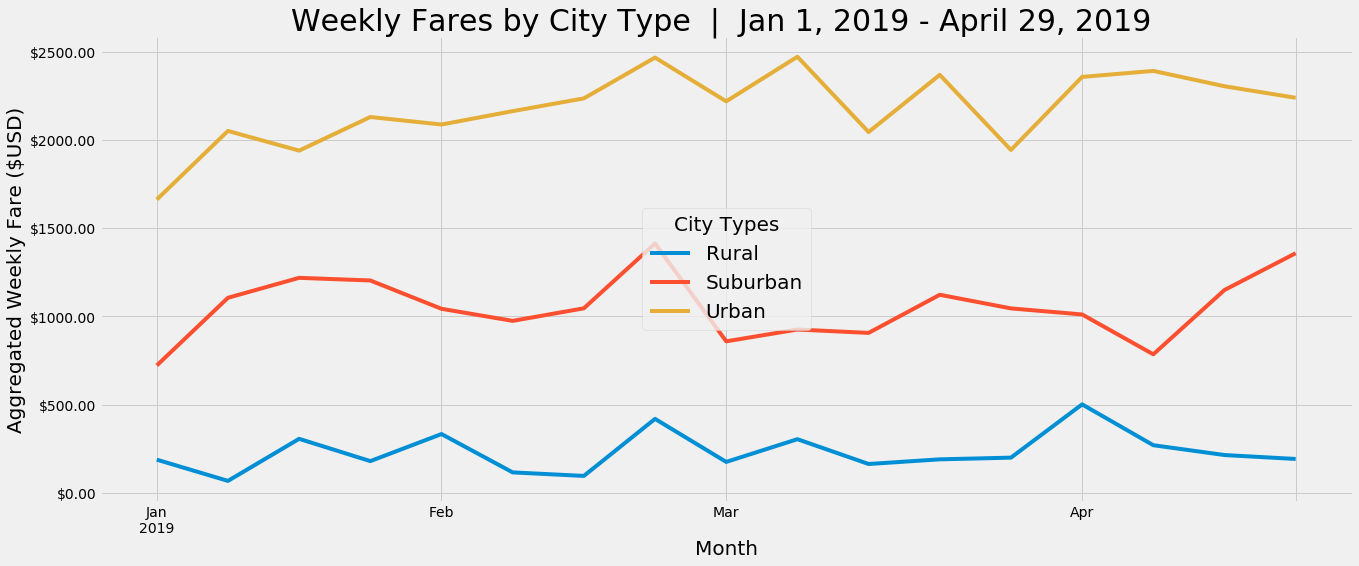

In [26]:
# 9. Using the object-oriented interface method, plot the resample DataFrame. 

# Choose style
plt.style.use('fivethirtyeight')

# Create a plot
ax = weekly_fares_df.plot(figsize=(20, 8))
                                
# Create titles, axis labels, and legend
ax.set_title("Weekly Fares by City Type  |  Jan 1, 2019 - April 29, 2019 ",fontsize=30)
ax.set_ylabel("Aggregated Weekly Fare ($USD)",fontsize=20)
ax.set_xlabel("Month",fontsize=20)
ax.grid

# Add the legend. 
lgnd = plt.legend(fontsize="20", loc="center", title="City Types")
lgnd.get_title().set_fontsize(20)

# Format the y-axis to be currency
# Get Code From: https://www.codegrepper.com/code-examples/python/matplotlib+dollar+sign
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# Save plot to analysis folder
plt.savefig("analysis/pyber_fare_summary.png")
plt.show()